In [56]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("/Users/pavan/Documents/FIFA_data.csv")

In [3]:
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18206 non-null  int64  
 1   ID                        18206 non-null  int64  
 2   Name                      18206 non-null  object 
 3   Age                       18206 non-null  int64  
 4   Photo                     18206 non-null  object 
 5   Nationality               18206 non-null  object 
 6   Flag                      18206 non-null  object 
 7   Overall                   18206 non-null  int64  
 8   Potential                 18206 non-null  int64  
 9   Club                      17965 non-null  object 
 10  Club Logo                 18206 non-null  object 
 11  Value                     18206 non-null  object 
 12  Wage                      18206 non-null  object 
 13  Special                   18206 non-null  int64  
 14  Prefer

In [5]:
# renaming columns

In [6]:
data.rename(columns = {'Unnamed: 0':'Duplicate'}, inplace = True)

In [7]:
# dropping duplicate columns

In [8]:
data.drop(['Photo','Flag','Club Logo','Duplicate'],axis=1,inplace=True)
data.shape

(18206, 85)

In [9]:
# data manipulation - columns conversion

In [10]:
data[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
...,...,...,...
18201,€60K,€1K,€153K
18202,€60K,€1K,€143K
18203,€60K,€1K,€113K
18204,€60K,€1K,€165K


In [11]:
def Value_float(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)
data['Value'] = data['Value'].apply(Value_float)
data['Wage'] = data['Wage'].apply(Value_float)
data['Release Clause'] = data['Release Clause'].apply(Value_float)

In [12]:
data[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0
...,...,...,...
18201,60000.0,1000.0,153000.0
18202,60000.0,1000.0,143000.0
18203,60000.0,1000.0,113000.0
18204,60000.0,1000.0,165000.0


In [13]:
# target column - release clause class

In [14]:
def income(x):
    if x<=1000000:
        return 'low_income_class'
    elif x>100000:
        return 'high_income_class'   
data["Release_Clause_Class"] = data["Release Clause"].apply(income)
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release_Clause_Class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,high_income_class
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,high_income_class
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,high_income_class
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,high_income_class
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,high_income_class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,243413,D. Walsh,18,Republic of Ireland,47,68,Waterford FC,60000.0,1000.0,1098,...,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,153000.0,low_income_class
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,low_income_class
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,low_income_class
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1189,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0,low_income_class


In [15]:
data["Release Clause"].min()

13000.0

In [16]:
data["Release Clause"].max()

228100000.0

In [17]:
data["Release_Clause_Class"].value_counts()

high_income_class    8864
low_income_class     7778
Name: Release_Clause_Class, dtype: int64

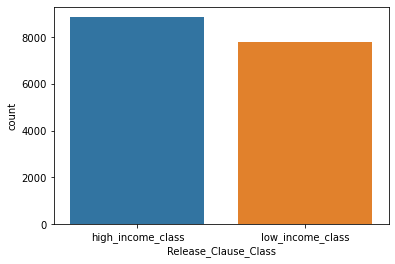

In [18]:
sns.countplot(x="Release_Clause_Class",data=data)
plt.show()

In [19]:
data["Release_Clause_Class"] = data["Release_Clause_Class"].map({"low_income_class":0,
                                                                 "high_income_class":1})

In [20]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release_Clause_Class
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1.0


In [21]:
# converting columns

In [22]:
data['Joined'].isna().sum()

1553

In [23]:
data['Joined']=data['Joined'].fillna('0')

In [24]:
data['Joined'].isna().sum()

0

In [25]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [26]:
def str4(x):
    if isinstance(x,str):
        return int(x[-4:])
data['Joined'] = data['Joined'].apply(str4)

In [27]:
data['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

In [28]:
data['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [29]:
data['Contract Valid Until']= pd.to_datetime(data['Contract Valid Until'])

In [30]:
data['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [31]:
data['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [32]:
def feet(x):
    l=[]
    if isinstance(x,str):
        l = x.split("'")
        i = int(l[0])
        j = int(l[1])
        f = ((i*12)+j)/12
        return f
data['Height'] = data['Height'].apply(feet)

In [33]:
data['Height'].head()

0    5.583333
1    6.166667
2    5.750000
3    6.333333
4    5.916667
Name: Height, dtype: float64

In [34]:
data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [35]:
def llbs(x):
    l=[]
    if isinstance(x,str):
        l = x.split("lbs")
        i = l[0]
        return float(i)
data['Weight'] = data['Weight'].apply(llbs)

In [36]:
data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [37]:
# filling null values with mean

In [38]:
data['Weight'].fillna(data['Weight'].mean(), inplace = True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Height'].fillna(data['Height'].mean(), inplace = True)
data['Joined'].fillna(data['Joined'].mean(), inplace = True)

In [39]:
# total number of unique positions and tables

In [40]:
data['Position'] = data['Position'].replace(np.nan, 0)
pos = list(data['Position'].unique()) 
print('Total number of unique positions:', len(pos)); print()
print('Positions:', pos)

Total number of unique positions: 28

Positions: ['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 0]


In [41]:
positiongroup = data.groupby(data['Position'])
tables = list()
for i in pos:
    a = positiongroup.get_group(i).sort_values('Overall',ascending=0).head(5)
    tables.append(a)
print('Total no. of tables:',len(tables))

Total no. of tables: 28


In [42]:
# repetition of players

In [43]:
idlist = list()
for i in range(0,len(pos)):
    a = tables[i]['ID']
    idlist.append(set(a.values))

In [44]:
ComIDs = []; x=0
while x<28:
    l = []; y=27
    while y>=0:
        if x != y:
            set1 = idlist[x].intersection(idlist[y])
            l.extend(list(set1))
            l = list(set(l))
        y -= 1
    ComIDs.extend(l)
    ComIDs = list(set(ComIDs))
    x += 1

if len(ComIDs)==0:
    print('There are no players appearing in more than one table.')
else:
    print('Players appearing in more than one table are:{}'.format(df1[df1['ID'] in ComIDs]))

There are no players appearing in more than one table.


In [45]:
# average wage for players in the corresponding tables

In [46]:
avgwage = list()
for i in range(0,len(pos)):
    m = tables[i]['Wage'].mean()
    avgwage.append(m)
    print('Average wage for the top 5 in {}: {}'.format(pos[i],avgwage[i]))

Average wage for the top 5 in RF: 148000.0
Average wage for the top 5 in ST: 294000.0
Average wage for the top 5 in LW: 261000.0
Average wage for the top 5 in GK: 192800.0
Average wage for the top 5 in RCM: 240800.0
Average wage for the top 5 in LF: 121200.0
Average wage for the top 5 in RS: 132200.0
Average wage for the top 5 in RCB: 231000.0
Average wage for the top 5 in LCM: 184400.0
Average wage for the top 5 in CB: 139600.0
Average wage for the top 5 in LDM: 126600.0
Average wage for the top 5 in CAM: 174000.0
Average wage for the top 5 in CDM: 217000.0
Average wage for the top 5 in LS: 130200.0
Average wage for the top 5 in LCB: 162000.0
Average wage for the top 5 in RM: 131400.0
Average wage for the top 5 in LAM: 81600.0
Average wage for the top 5 in LM: 164600.0
Average wage for the top 5 in LB: 177200.0
Average wage for the top 5 in RDM: 105000.0
Average wage for the top 5 in RW: 202000.0
Average wage for the top 5 in CM: 130600.0
Average wage for the top 5 in RB: 155400.0
Ave

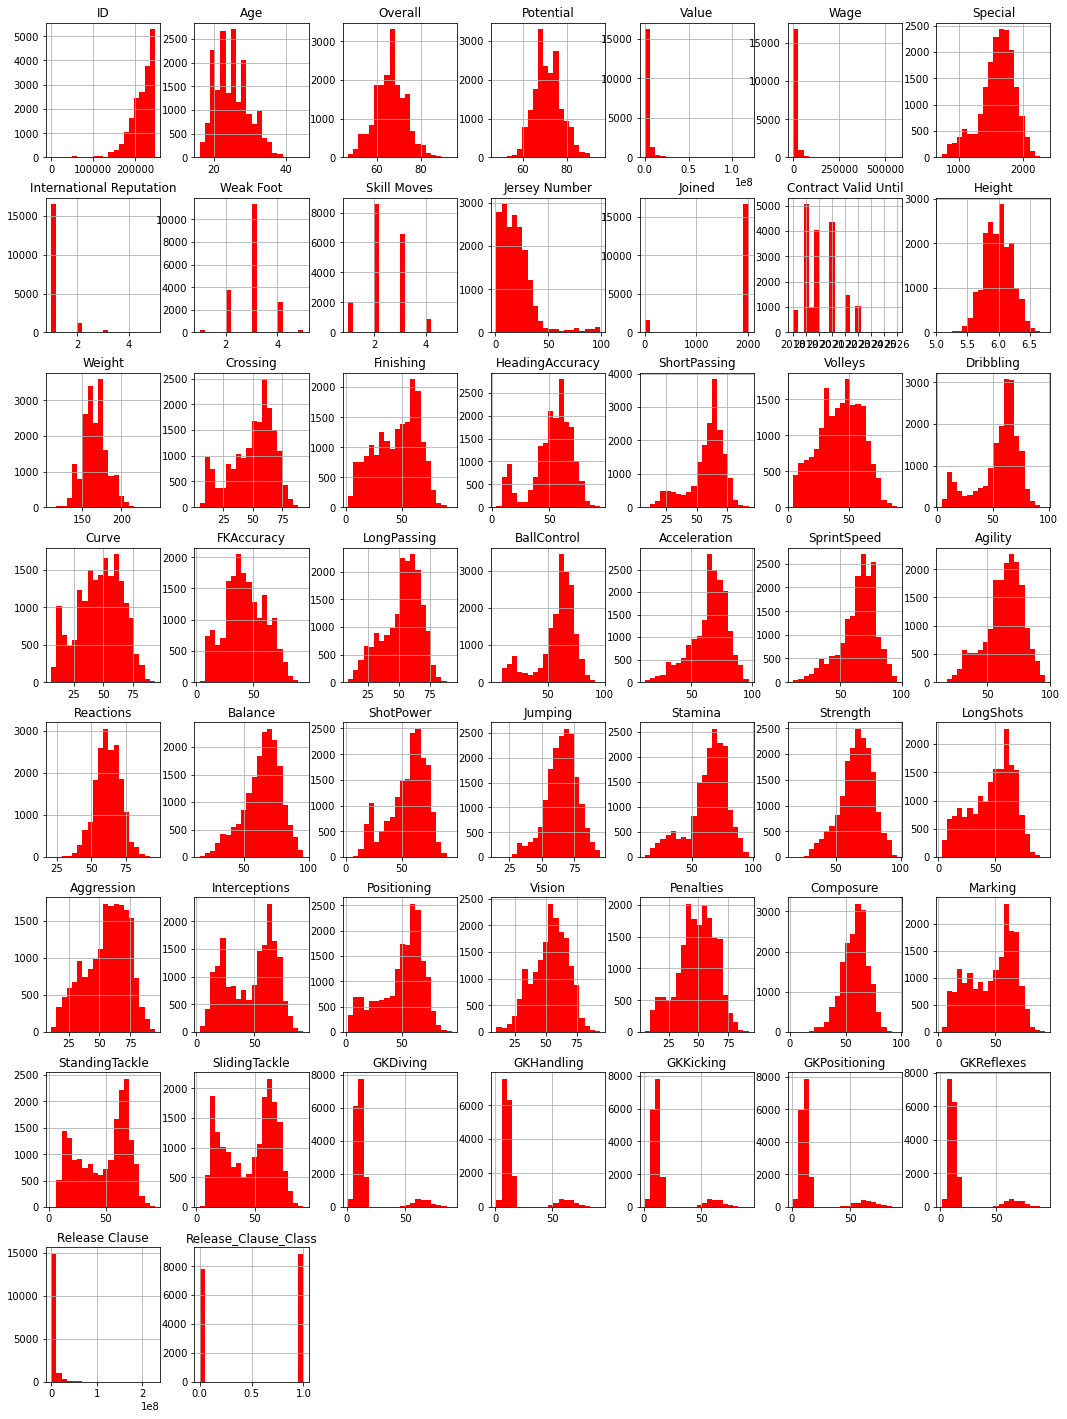

In [47]:
data.hist(figsize=(18,25),bins=20, color="red")
plt.show()

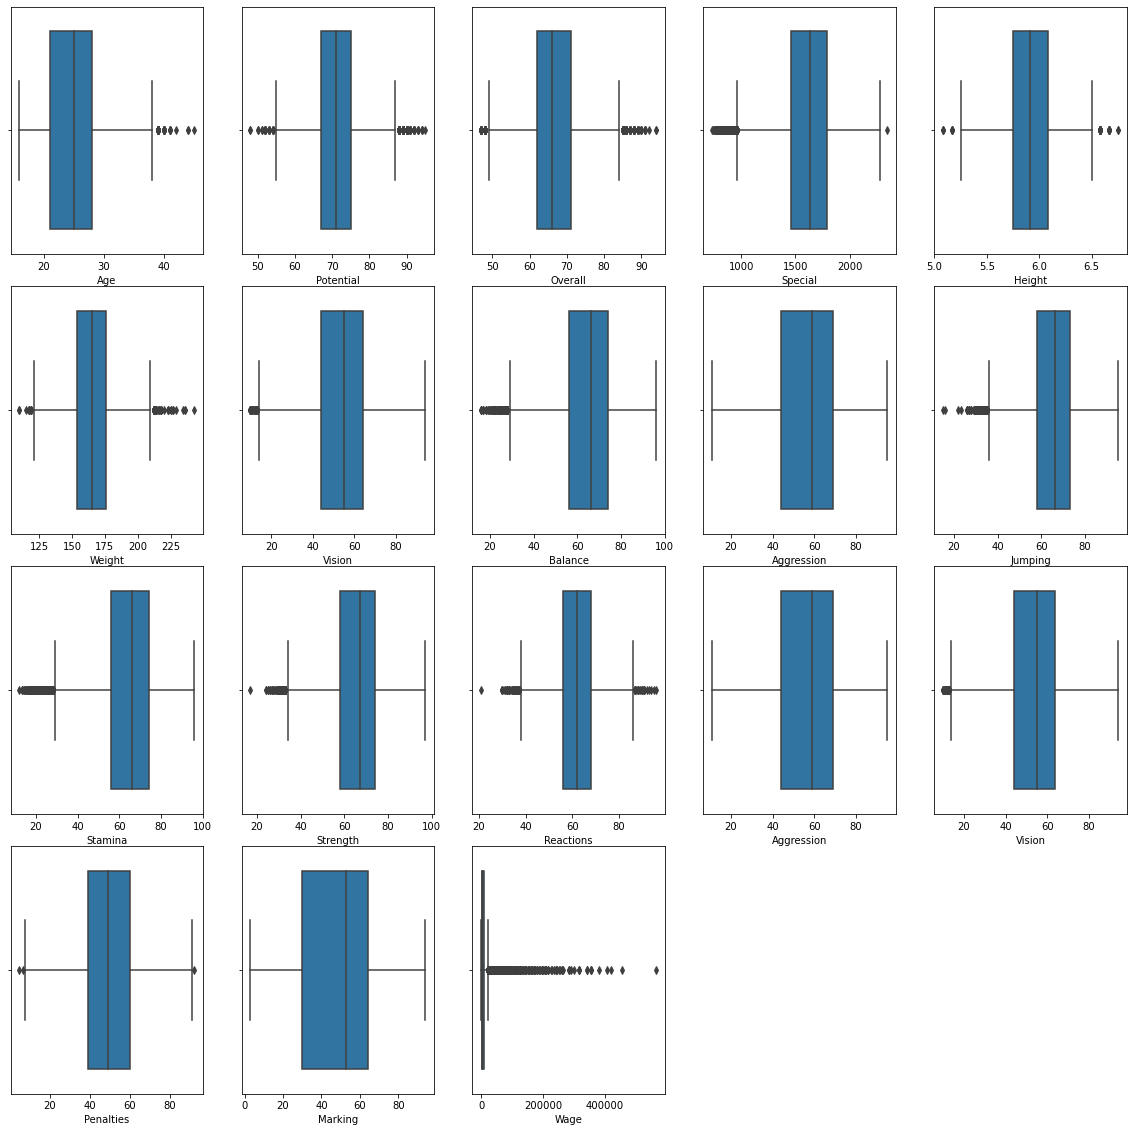

In [48]:

plt.figure(figsize =(20, 20 ))
lowlist=['Age','Potential','Overall','Special','Height','Weight','Vision','Balance','Aggression','Jumping','Stamina','Strength',
         'Reactions','Aggression','Vision','Penalties','Marking','Wage']
for i in range(18):
    #plt.title(lowlist[i])
    plt.subplot(4, 5, i+1)
    plt.subplots_adjust( hspace=0.130)
    sns.boxplot(x=data[lowlist[i]])

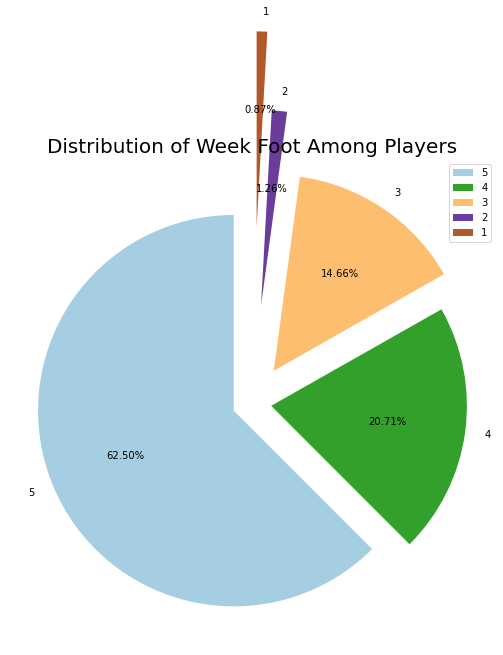

In [49]:
#BarPlot Distribution of Week Foot Among Players
labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Paired(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors=colors, startangle=90, shadow=False,explode=explode, autopct='%1.2f%%')
plt.title('Distribution of Week Foot Among Players', fontsize = 20)
plt.legend()
plt.show()

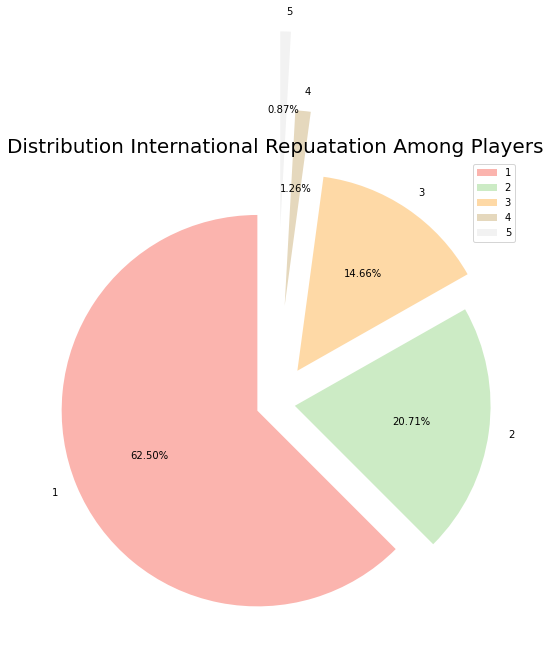

In [50]:
#BarPlot Distribution International Repuatation Among Players
labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.Pastel1(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors=colors, startangle=90, shadow=False,explode=explode, autopct='%1.2f%%')
plt.title('Distribution International Repuatation Among Players', fontsize = 20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Overall Score vs Vision Score')

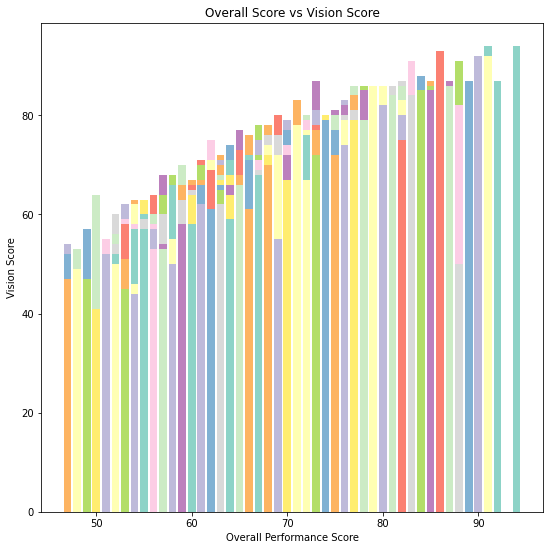

In [51]:
#Relationship between Vision Score and Overall Score
colors = plt.cm.Set3(np.linspace(0, 1, 60))
plt.bar(data['Overall'],data['Vision'],color=colors)
plt.xlabel('Overall Performance Score')
plt.ylabel('Vision Score')
plt.title("Overall Score vs Vision Score")


In [52]:
# Top 10 players wrt there skills / parameters
SprintSpeed = data.sort_values(by=['SprintSpeed'], ascending=False).head(10)
Strength = data.sort_values(by=['Strength'], ascending=False).head(10)
finish = data.sort_values(by=['Finishing'], ascending=False).head(10)

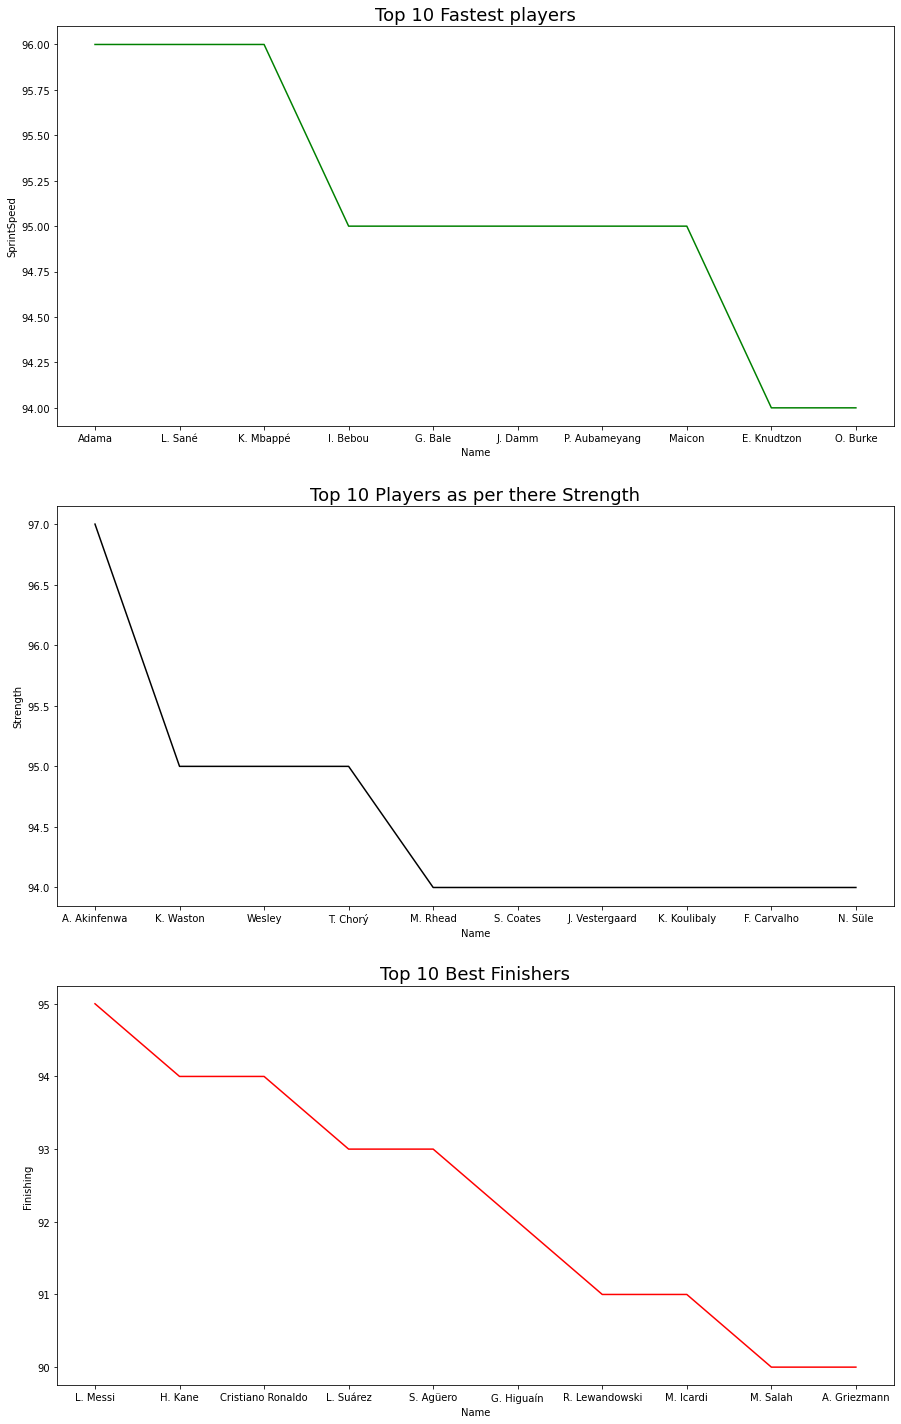

In [53]:
fig, ax1 = plt.subplots(nrows=3, ncols=1, figsize=[15, 25])
#SprintSpeed
plot1 = sns.lineplot(SprintSpeed["Name"],SprintSpeed["SprintSpeed"],ax = ax1[0], color = "GREEN")
plot1.set_title("Top 10 Fastest players", fontsize=18)
#Jumping
plot2 = sns.lineplot(Strength["Name"],Strength["Strength"],ax = ax1[1], color = "black")
plot2.set_title("Top 10 Players as per there Strength", fontsize=18)
#Finishig
plot3 = sns.lineplot(finish["Name"],finish["Finishing"],ax = ax1[2], color = "Red")
plot3.set_title("Top 10 Best Finishers", fontsize=18)

plt.show()


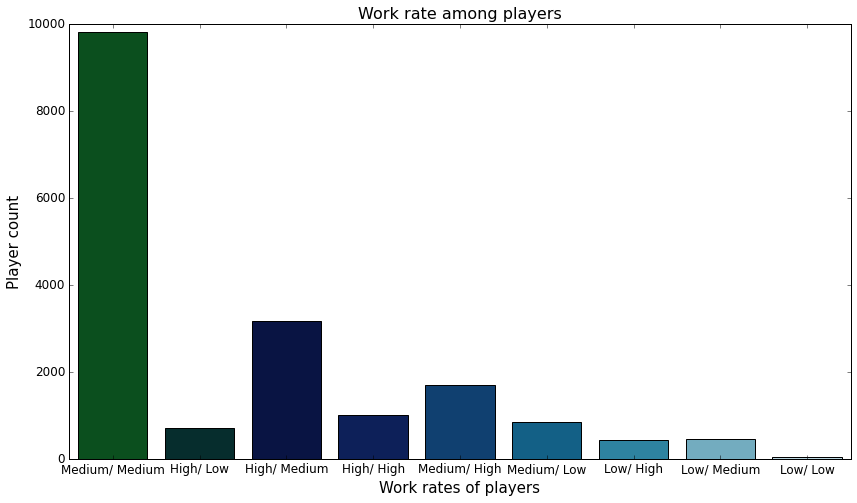

In [54]:
#work rates of players
plt.figure(figsize =(14,8))
plt.style.use('classic')

sns.countplot(x= "Work Rate", data = data, palette = 'ocean')
plt.title('Work rate among players', fontsize = 16)
plt.xlabel("Work rates of players", fontsize= 15)
plt.ylabel("Player count", fontsize = 15)
plt.show()

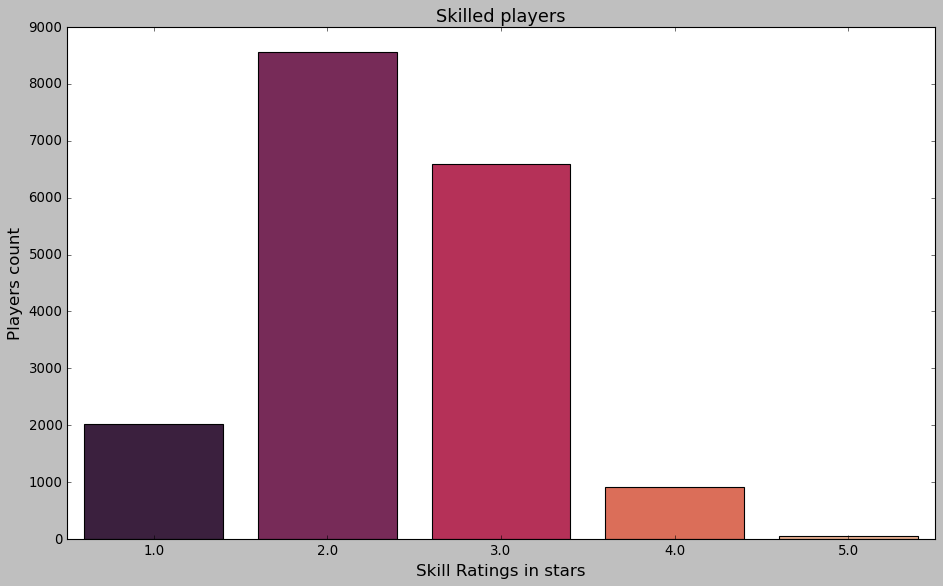

In [55]:
#skill moves of players
plt.figure(figsize = (14,8))
ax = sns.countplot(x= 'Skill Moves', data = data, palette ='rocket')
ax.set_title(label = 'Skilled players', fontsize =16)
ax.set_xlabel(xlabel = 'Skill Ratings in stars', fontsize = 15)
ax.set_ylabel(ylabel = 'Players count', fontsize = 15)
plt.show()


In [57]:
from wordcloud import WordCloud  

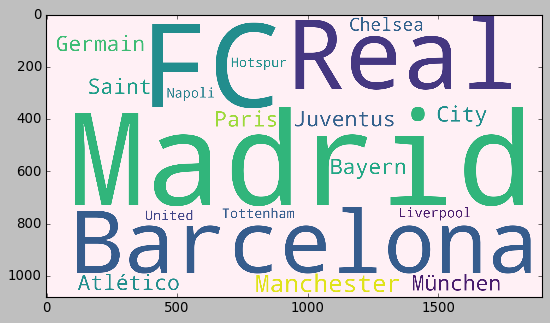

In [76]:
#the name of the club

wordcloud = WordCloud(
                          background_color='lavenderblush',
                          width=1900,
                          height=1080
                         ).generate(" ".join(data.Club[0:30]))
plt.imshow(wordcloud)
plt.show()

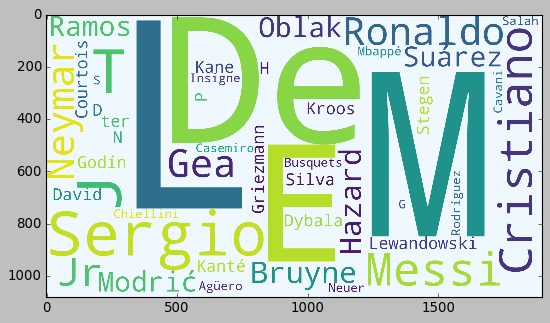

In [75]:
wordcloud = WordCloud(
                          background_color='aliceblue',
                          width=1900,
                          height=1080
                         ).generate(" ".join(data.Name[0:30]))
plt.imshow(wordcloud)
plt.show()